In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd 
import matplotlib.pyplot as plt
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [2]:
# Data Preprocessing: Data Cleaning
data = pd.read_csv('test.csv' , encoding='unicode_escape')
data.drop(data.columns[0],inplace=True , axis= 1)
data.drop(data.columns[2:],inplace=True , axis= 1)
data.head(n=10)

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive
5,that`s great!! weee!! visitors!,positive
6,I THINK EVERYONE HATES ME ON HERE lol,negative
7,"soooooo wish i could, but im in school and my...",negative
8,and within a short time of the last clue all ...,neutral
9,What did you get? My day is alright.. haven`...,neutral


In [3]:
data.shape

(4815, 2)

In [4]:
print("Nan Values \n",data.isna().sum())
data.dropna(inplace=True)
print("After Drop Nan Column \n",data.isna().sum())
data.shape

Nan Values 
 text         1281
sentiment    1281
dtype: int64
After Drop Nan Column 
 text         0
sentiment    0
dtype: int64


(3534, 2)

In [5]:
# Clean the text data
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251\U0001F910-\U0001F9FF]+', flags=re.UNICODE)

def datacleaning(text):
    text = re.sub('<[^>]*>', ' ', text)  # Removing HTML tags
    text = emoji_pattern.sub('', text)  # Removing emojis
    text = re.sub(r'\W', ' ', text.lower())  # Removing non-word characters and converting to lowercase
    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set]  # Stemming and removing stopwords
    return " ".join(text)

data['text'] = data['text'].apply(lambda x: datacleaning(x))
data

,text,sentiment
0,last session day http twitpic com 67ezh,neutral
1,shanghai also realli excit precis skyscrap gal...,positive
2,recess hit veroniqu branquinho quit compani shame,negative
3,happi bday,positive
4,http twitpic com 4w75p like,positive
...,...,...
3529,3 im tire sleep tri,negative
3530,alon old hous thank net keep aliv kick whoever...,positive
3531,know mean littl dog sink depress want move som...,negative
3532,_sutra next youtub video gonna love video,positive


In [6]:
class_distribution = data['sentiment'].value_counts()
print(class_distribution)


sentiment
neutral     1430
positive    1103
negative    1001
Name: count, dtype: int64


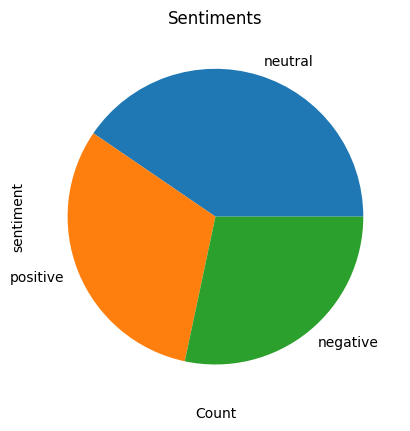

In [7]:

top_sentiments = data['sentiment'].value_counts()
top_sentiments.plot(kind='pie')
plt.xlabel('Count')
plt.ylabel('sentiment')
plt.title('Sentiments') 
plt.savefig('sentiment_analysis_project')
plt.show()


In [8]:
tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
X = tfidf.fit_transform(data['text'])
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['sentiment'])
y

array([1, 2, 0, ..., 0, 2, 2])

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.5,shuffle=False)
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    4.6s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    4.7s finished


In [10]:
import pickle
import numpy as np
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))
with open('clf.pkl', 'rb') as f: 
    model = pickle.load(f)

with open('tfidf.pkl', 'rb') as tf:
    victorizer = pickle.load(tf)


text = "suck "
X=victorizer.transform([text])
sentiment = model.predict(X)


print(sentiment)


[0]


In [11]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.48      0.54       504
           1       0.53      0.71      0.61       708
           2       0.73      0.57      0.64       555

    accuracy                           0.60      1767
   macro avg       0.63      0.59      0.60      1767
weighted avg       0.62      0.60      0.60      1767



In [39]:
def prediction(comment):
    preprocessed_comment = datacleaning(comment)
    comment_list = [preprocessed_comment]  
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)[0]
    if prediction == 2:
        print("positive comment")
    elif prediction == 0 :
        print("negative comment")
    else :
        print("neutral comment")
    return prediction



print(prediction("this product not bad")
)
    
    

negative comment
0
